# Human hematopoesis dynamo analysis

## Library imports

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot
import matplotlib.pyplot as plt

import sys
import os

from sklearn.metrics import roc_auc_score
import dynamo as dyn
from dynamo.tools.utils import nearest_neighbors

## General settings

In [ ]:
dyn.dynamo_logger.main_silence()

In [ ]:
sns.reset_defaults()
sns.reset_orig()
scv.settings.set_figure_params('scvelo', dpi_save=400, dpi=80, transparent=True, fontsize=14, color_map='viridis')

In [ ]:
SAVE_FIGURES = True
if SAVE_FIGURES:
    os.makedirs(FIG_DIR / 'hematopoiesis',exist_ok = True)

SAVE_DATASETS = True
if SAVE_DATASETS:
    os.makedirs(DATA_DIR / 'hematopoiesis',exist_ok = True)

## Load datasets

In [87]:
adata_labeling  = sc.read_h5ad("RegVelo_datasets/hematopoiesis/hsc_dynamo_adata.h5ad")
human_tfs = pd.read_csv("RegVelo_datasets/hematopoiesis/allTFs_hg38.csv",header = None)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = 'RegVelo_datasets/hematopoiesis/hsc_dynamo_adata.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

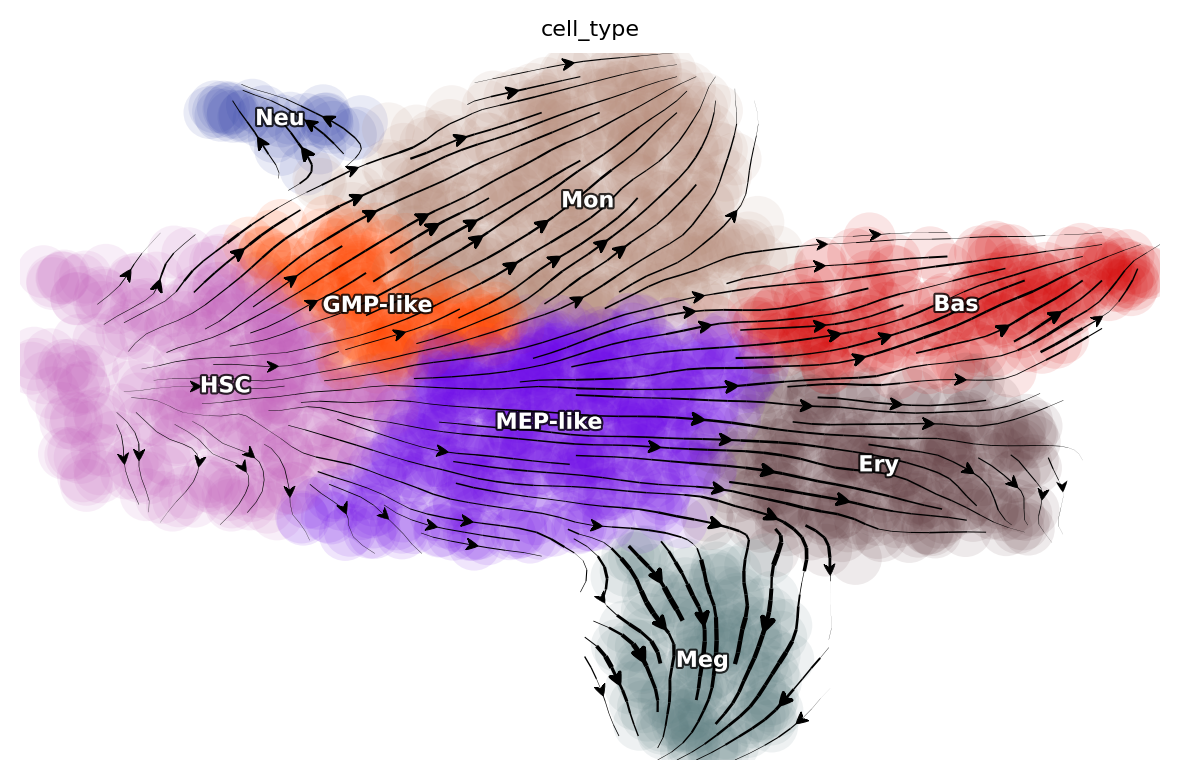

In [5]:
dyn.pl.streamline_plot(adata_labeling, basis="umap", color="cell_type")

HSC_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "HSC")
Meg_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Meg")
Ery_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Ery")
Bas_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Bas")
Mon_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Mon")
Neu_cells = dyn.tl.select_cell(adata_labeling, "cell_type", "Neu")

In [6]:
fixed_points = np.array(
    [
        [8.45201833, 9.37697661],
        [14.00630381, 2.53853712],
        [17.30550636, 6.81561775],
        [18.06891717, 11.9840678],
        [14.13613403, 15.22244713],
        [9.72644402, 14.83745969],
    ]
)

HSC_cells_indices = nearest_neighbors(fixed_points[0], adata_labeling.obsm["X_umap"])
Meg_cells_indices = nearest_neighbors(fixed_points[1], adata_labeling.obsm["X_umap"])
Ery_cells_indices = nearest_neighbors(fixed_points[2], adata_labeling.obsm["X_umap"])
Bas_cells_indices = nearest_neighbors(fixed_points[3], adata_labeling.obsm["X_umap"])
Mon_cells_indices = nearest_neighbors(fixed_points[4], adata_labeling.obsm["X_umap"])
Neu_cells_indices = nearest_neighbors(fixed_points[5], adata_labeling.obsm["X_umap"])

In [7]:
plt.scatter(*adata_labeling.obsm["X_umap"].T)
for indices in [
    HSC_cells_indices,
    Meg_cells_indices,
    Ery_cells_indices,
    Bas_cells_indices,
    Mon_cells_indices,
    Neu_cells_indices,
]:
    plt.scatter(*adata_labeling[indices[0]].obsm["X_umap"].T)

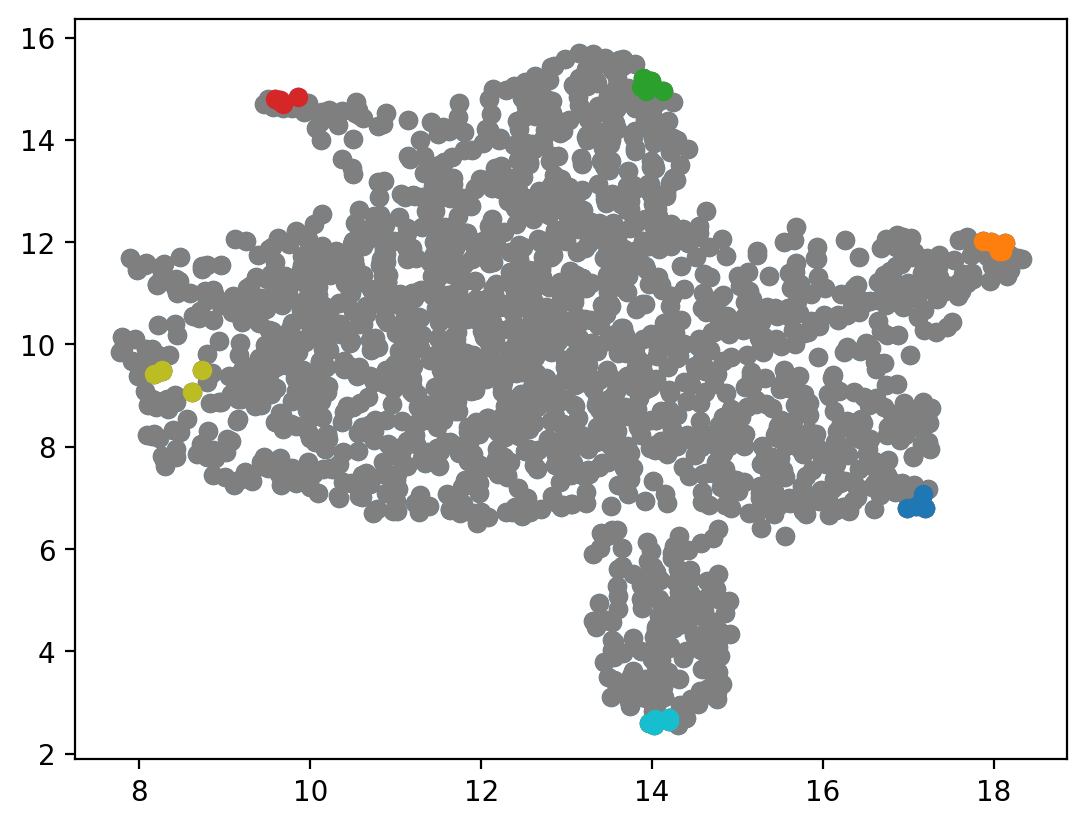

In [8]:
plt.scatter(*adata_labeling.obsm["X_umap"].T)
for indices in [
    HSC_cells_indices,
    Meg_cells_indices,
    Ery_cells_indices,
    Bas_cells_indices,
    Mon_cells_indices,
    Neu_cells_indices,
]:
    plt.scatter(*adata_labeling[indices[0]].obsm["X_umap"].T)
plt.show()

In [9]:
HSC_cells_indices

array([[1587, 1557, 1725, 1091, 1070]])

In [10]:
dyn.tl.neighbors(adata_labeling, basis="umap", result_prefix="umap")

|-----> Start computing neighbor graph...
|-----------> X_data is None, fetching or recomputing...
|-----> fetching X data from layer:None, basis:umap
|-----> method arg is None, choosing methods automatically...
|-----------> method kd_tree selected


AnnData object with n_obs × n_vars = 1947 × 21701
    obs: 'batch', 'cell_type', 'time', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'total_Size_Factor', 'initial_total_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'Size_Factor', 'initial_cell_size', 'new_Size_Factor', 'initial_new_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr'
    var: 'query', 'scopes', '_id', '_score', 'symbol', 'nCells', 'nCounts', 'pass_basic_filter', 'log_cv', 'score', 'log_m', 'frac', 'use_for_pca'
    uns: 'PCs', 'batch_colors', 'cell_type_colors', 'dynamics', 'explained_variance_ratio_', 'feature_selection', 'genes_to_use', 'grid_velocity_umap', 'neighbors', 'pca_mean', 'pp', 'velocyto_SVR', 'umap_neighbors'
    obsm: 'X_pca', 'X_umap', 'velocity_umap'
    layers: 'M_n', 'M_nn', 'M_s', 'M_ss', 'M_t', 'M_tn', 'M_tt', 'M_u', 'M_us', 'M_uu', 'X_new', 'X_spliced', 'X_total', 'X_unspliced', 'new', 'spliced', 'total', 'unspliced', 'velocity_N', 'velocity_T', 'veloc

In [11]:
dyn.tl.cell_velocities(
    adata_labeling,
    enforce=True,
    X=adata_labeling.layers["M_t"],
    V=adata_labeling.layers["velocity_alpha_minus_gamma_s"],
    method="cosine",basis = "pca"
);
dyn.vf.VectorField(adata_labeling, basis='pca')

|-----> [calculating transition matrix via cosine kernel with sqrt transform.] in progress: 100.0000%|-----> [calculating transition matrix via cosine kernel with sqrt transform.] completed [172.6588s]
|-----> [projecting velocity vector to low dimensional embedding] in progress: 100.0000%|-----> [projecting velocity vector to low dimensional embedding] completed [0.7028s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.7237s]
|-----> [VectorField] completed [0.8720s]


In [75]:
transition_graph = {}
cell_type = ["HSC", "Ery", "Mon"]
start_cell_indices = [
    HSC_cells_indices,
    Ery_cells_indices,
    Mon_cells_indices,
]
end_cell_indices = start_cell_indices
for i, start in enumerate(start_cell_indices):
    for j, end in enumerate(end_cell_indices):
        if start is not end:
            min_lap_t = True if i == 0 else False
            lap = dyn.pd.least_action(
                adata_labeling,
                [adata_labeling.obs_names[start[0]][0]],
                [adata_labeling.obs_names[end[0]][0]],
                basis="pca",
                adj_key="cosine_transition_matrix",
                min_lap_t=min_lap_t,
                EM_steps=2,
            )
            # The `GeneTrajectory` class can be used to output trajectories for any set of genes of interest
            gtraj = dyn.pd.GeneTrajectory(adata_labeling)
            gtraj.from_pca(lap.X, t=lap.t)
            gtraj.calc_msd()
            ranking = dyn.vf.rank_genes(adata_labeling, "traj_msd")

            print(start, "->", end)
            genes = ranking[:5]["all"].to_list()
            arr = gtraj.select_gene(genes)

            transition_graph[cell_type[i] + "->" + cell_type[j]] = {
                "lap": lap,
                "LAP_pca": adata_labeling.uns["LAP_pca"],
                "ranking": ranking,
                "gtraj": gtraj,
            }

|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.021818
|-----> [iterating through 1 pairs] completed [60.6514s]
|-----> [least action path] completed [60.6538s]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


[[1587 1557 1725 1091 1070]] -> [[107 403  22 729 114]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.026808
|-----> [iterating through 1 pairs] completed [65.3152s]
|-----> [least action path] completed [65.3172s]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


[[1587 1557 1725 1091 1070]] -> [[583 406  82 273 477]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.073282
|-----> [iterating through 1 pairs] completed [12.9388s]
|-----> [least action path] completed [12.9405s]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


[[107 403  22 729 114]] -> [[1587 1557 1725 1091 1070]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.066373
|-----> [iterating through 1 pairs] completed [8.5453s]
|-----> [least action path] completed [8.5469s]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


[[107 403  22 729 114]] -> [[583 406  82 273 477]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.062954
|-----> [iterating through 1 pairs] completed [12.5518s]
|-----> [least action path] completed [12.5534s]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


[[583 406  82 273 477]] -> [[1587 1557 1725 1091 1070]]
|-----> searching for the least action path...
|-----> [iterating through 1 pairs] in progress: 100.0000%|-----------> initializing path with the shortest path in the graph built from the velocity transition matrix...
|-----------> optimizing for least action path...
|-----> optimal action: 0.044929
|-----> [iterating through 1 pairs] completed [6.5829s]
|-----> [least action path] completed [6.5843s]
[[583 406  82 273 477]] -> [[107 403  22 729 114]]


/home/icb/weixu.wang/.local/lib/python3.10/site-packages/dynamo/prediction/trajectory.py:398: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.adata.var[save_key][self.genes_to_mask()] = msd


In [76]:
human_tfs = pd.read_csv("/home/icb/weixu.wang/regulatory_velo/cell_cycle/allTFs_hg38.txt",header = None)

In [77]:
human_tfs_names = human_tfs.iloc[:,0].tolist()

In [78]:
## evaluate ranking from HSC to Mon and Ery
HSC_Mon_ranking = transition_graph["HSC->Mon"]["ranking"]
HSC_Mon_ranking["TF"] = [i in human_tfs_names for i in list(HSC_Mon_ranking["all"])]

HSC_Ery_ranking = transition_graph["HSC->Ery"]["ranking"]
HSC_Ery_ranking["TF"] = [i in human_tfs_names for i in list(HSC_Ery_ranking["all"])]

In [79]:
#Ery_driver = ['LMO2', 'GATA1', 'TAL1', 'GFI1B','GATA2',"ZFPM1","LDB1"]
Ery_driver = ['NFIA','GATA1', 'TAL1',"GFI1B","LMO2"]
#Mon_driver = ['SPI1', 'CEBPZ', 'IRF3', 'MEF2A', 'MEF2C', 'ETS2', 'STAT6', 'STAT2']
Mon_driver = ["SPI1", "TCF4", "STAT6", "MEF2C"]

In [80]:
filter = adata_target.var_names[adata_target.uns["skeleton"].sum(1) != 0]

In [81]:
HSC_Ery_ranking["filter"] = [i in filter for i in list(HSC_Ery_ranking["all"])]
HSC_Mon_ranking["filter"] = [i in filter for i in list(HSC_Mon_ranking["all"])]

In [82]:
HSC_Ery_ranking = HSC_Ery_ranking.query("TF == True")
HSC_Mon_ranking = HSC_Mon_ranking.query("TF == True")
HSC_Ery_ranking = HSC_Ery_ranking.query("filter == True")
HSC_Mon_ranking = HSC_Mon_ranking.query("filter == True")

In [83]:
from sklearn.metrics import roc_auc_score
# Calculate AUROC
ID = set(Ery_driver).intersection(set(HSC_Ery_ranking.iloc[:,0].tolist()))
label = np.zeros(HSC_Ery_ranking.shape[0])
label[[i for i in range(HSC_Ery_ranking.shape[0]) if HSC_Ery_ranking.iloc[:,0].tolist()[i] in list(ID)]] = 1

score = -1 * np.array(range(HSC_Ery_ranking.shape[0]))
auroc_ery_vi = roc_auc_score(label, score)
print("AUROC:", auroc_ery_vi)

AUROC: 0.8814814814814815


In [84]:
from sklearn.metrics import roc_auc_score
# Calculate AUROC
ID = set(Mon_driver).intersection(set(HSC_Mon_ranking.iloc[:,0].tolist()))
label = np.zeros(HSC_Mon_ranking.shape[0])
label[[i for i in range(HSC_Mon_ranking.shape[0]) if HSC_Mon_ranking.iloc[:,0].tolist()[i] in list(ID)]] = 1

score = -1 * np.array(range(HSC_Mon_ranking.shape[0]))
auroc_ery_vi = roc_auc_score(label, score)
print("AUROC:", auroc_ery_vi)

AUROC: 0.6136363636363636
